In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
X= iris.data
Y= iris.target
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris_data = DataFrame(X, columns =['Sepal Length','Sepal Width','Petal Length','Petal Width'])
iris_target = DataFrame(Y, columns =['Species'])

In [8]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Veriscolour'
    else:
        return 'Virginica'

In [9]:
iris_target= iris_target['Species'].apply(flower)

In [10]:
iris_target.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: Species, dtype: object

In [11]:
iris = pd.concat([iris_data,iris_target], axis=1)

In [12]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


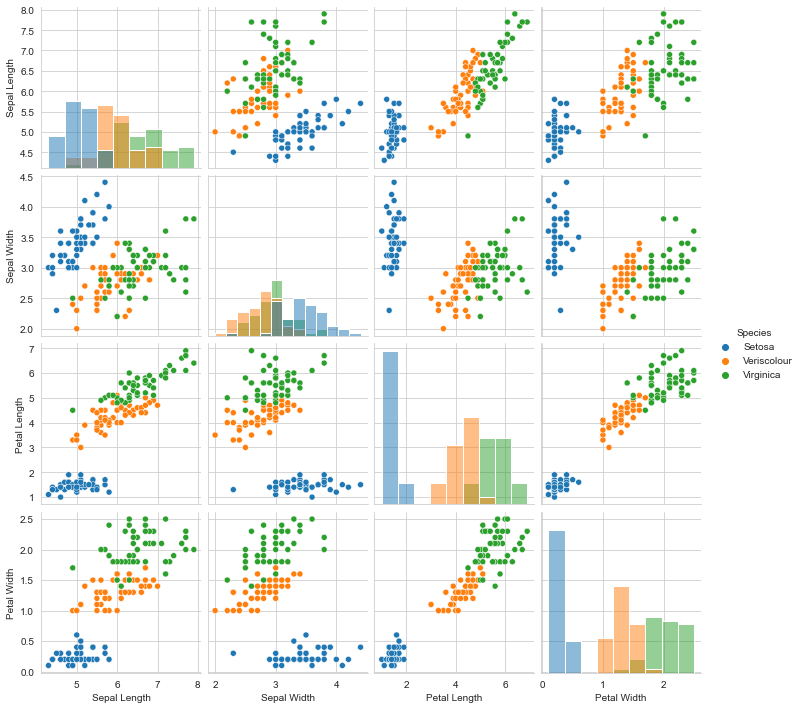

In [13]:
sns.pairplot(iris, hue ='Species', diag_kind ='hist')

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Petal Length', ylabel='count'>

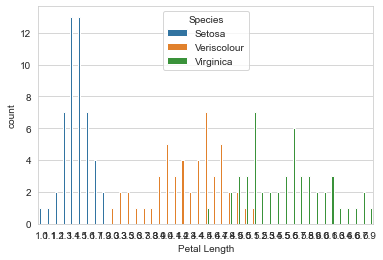

In [32]:
sns.countplot('Petal Length', data = iris , hue = 'Species')

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
logreg = LogisticRegression()

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.4,random_state =3)

In [18]:
logreg.fit(X_train, Y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
from sklearn import metrics

In [20]:
y_predict = logreg.predict(X_test)

In [21]:
print(metrics.accuracy_score(Y_test, y_predict))

0.9666666666666667


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors =1)

In [24]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
Y_predict = knn.predict(X_test)

In [26]:
print(metrics.accuracy_score(Y_test, Y_predict))

0.9666666666666667


In [27]:
k_range = range(1,21)
accuracy =[]
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors =i)
    knn.fit(X_train,Y_train)
    Y_predict = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_predict))

In [28]:
A =DataFrame(accuracy, columns =['Estimated_accuracy'])

In [29]:
A

,Estimated_accuracy
0,0.966667
1,0.966667
2,0.950000
3,0.950000
4,0.933333
5,0.950000
6,0.950000
7,0.950000
8,0.950000
9,0.933333


Text(0, 0.5, 'Accuracy Value')

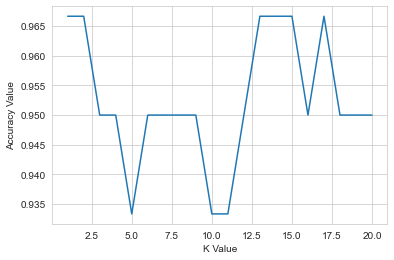

In [30]:
plt.plot(k_range, accuracy)
plt.xlabel('K Value')
plt.ylabel('Accuracy Value')